In [1]:
# import the required libraries

import pandas as pd
import numpy as np
import math

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#customising the visuals 
sns.set_palette('husl')
sns.set_style('darkgrid')

# import statistical libraries
from scipy.stats import chi2_contingency,f_oneway,pearsonr,spearmanr,kruskal
from statsmodels.api import  OLS

In [2]:
# load the dataset into the working directory

data = pd.read_csv('supermarket_sales.csv')

#### Inspect the dataset

In [3]:
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [6]:
# checking the data dimension

print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset')

There are 1000 rows and 17 columns in the dataset


In [9]:
# inspect datatype and missing values 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [8]:
# converting date to the right datatype

data['Date'] = data['Date'].apply(pd.to_datetime)

#### Visualisation

In [10]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

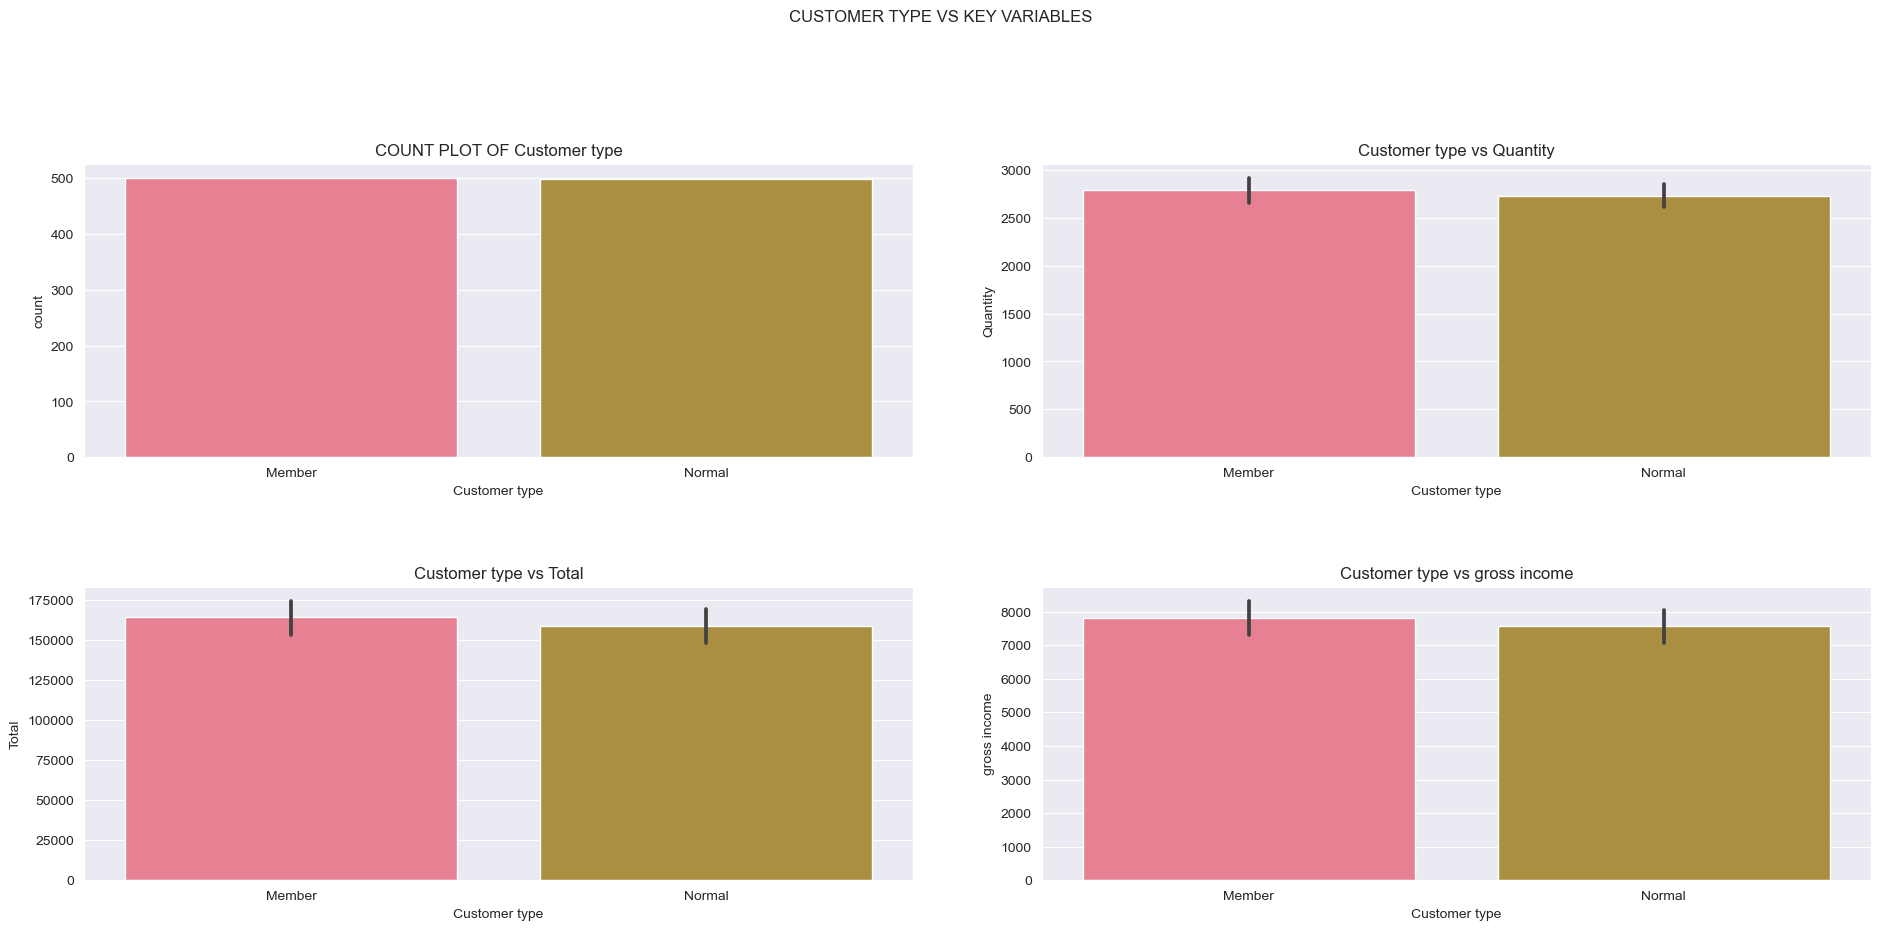

In [17]:
def get_plot(x, y, title):
    
    fig, axes = plt.subplots(2,2, figsize = (20,10))

    sns.countplot(data, x = x, ax = axes[0,0])
    sns.barplot(data, x = x,y = y[0], ax = axes[0,1], estimator= 'sum')
    sns.barplot(data, x = x, y = y[1], ax = axes[1,0], estimator= 'sum')
    sns.barplot(data, x = x, y = y[2], ax = axes[1,1], estimator= 'sum')

    axes[0,0].set_title(f'COUNT PLOT OF {x}')
    axes[0,1].set_title(f'{x} vs {y[0]}')
    axes[1,0].set_title(f'{x} vs {y[1]}')
    axes[1,1].set_title(f'{x} vs {y[2]}')

    plt.suptitle(title)

    fig.tight_layout(pad = 5)
    
get_plot(x = 'Customer type', y = ['Quantity','Total','gross income'],
         title= 'CUSTOMER TYPE VS KEY VARIABLES')

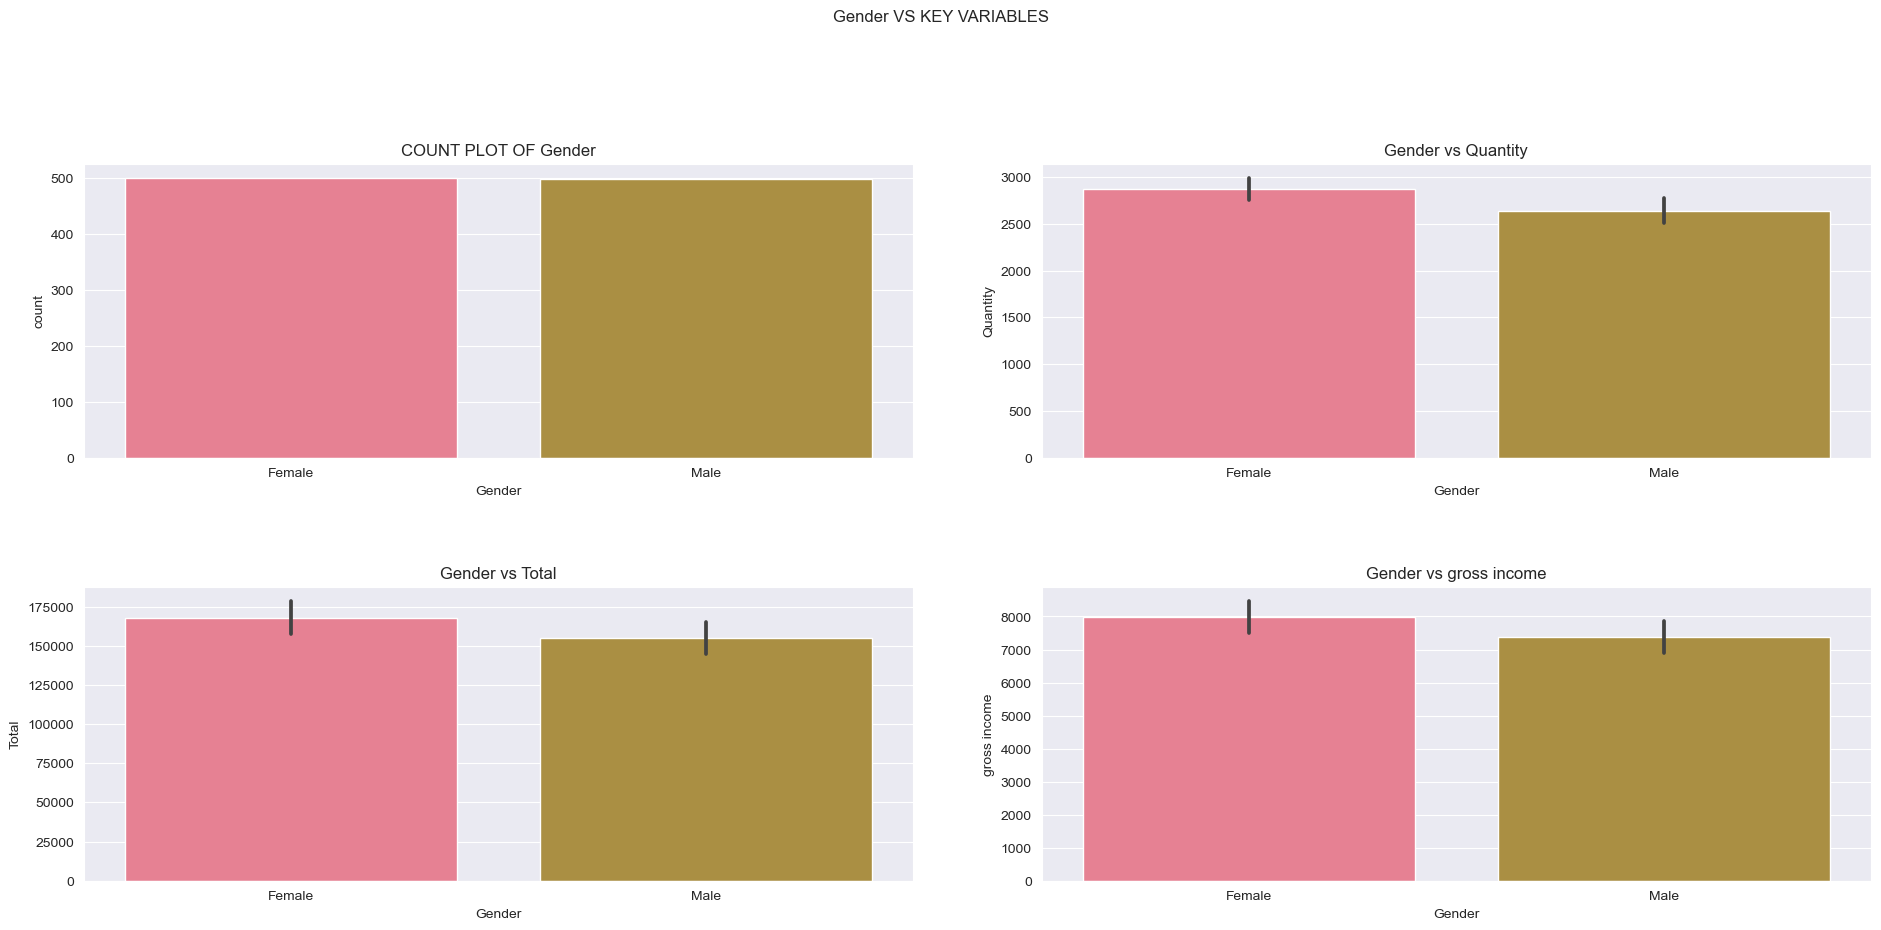

In [18]:
# plotting gender vs important variables

get_plot(x = 'Gender', y = ['Quantity','Total','gross income'],
         title= 'Gender VS KEY VARIABLES')

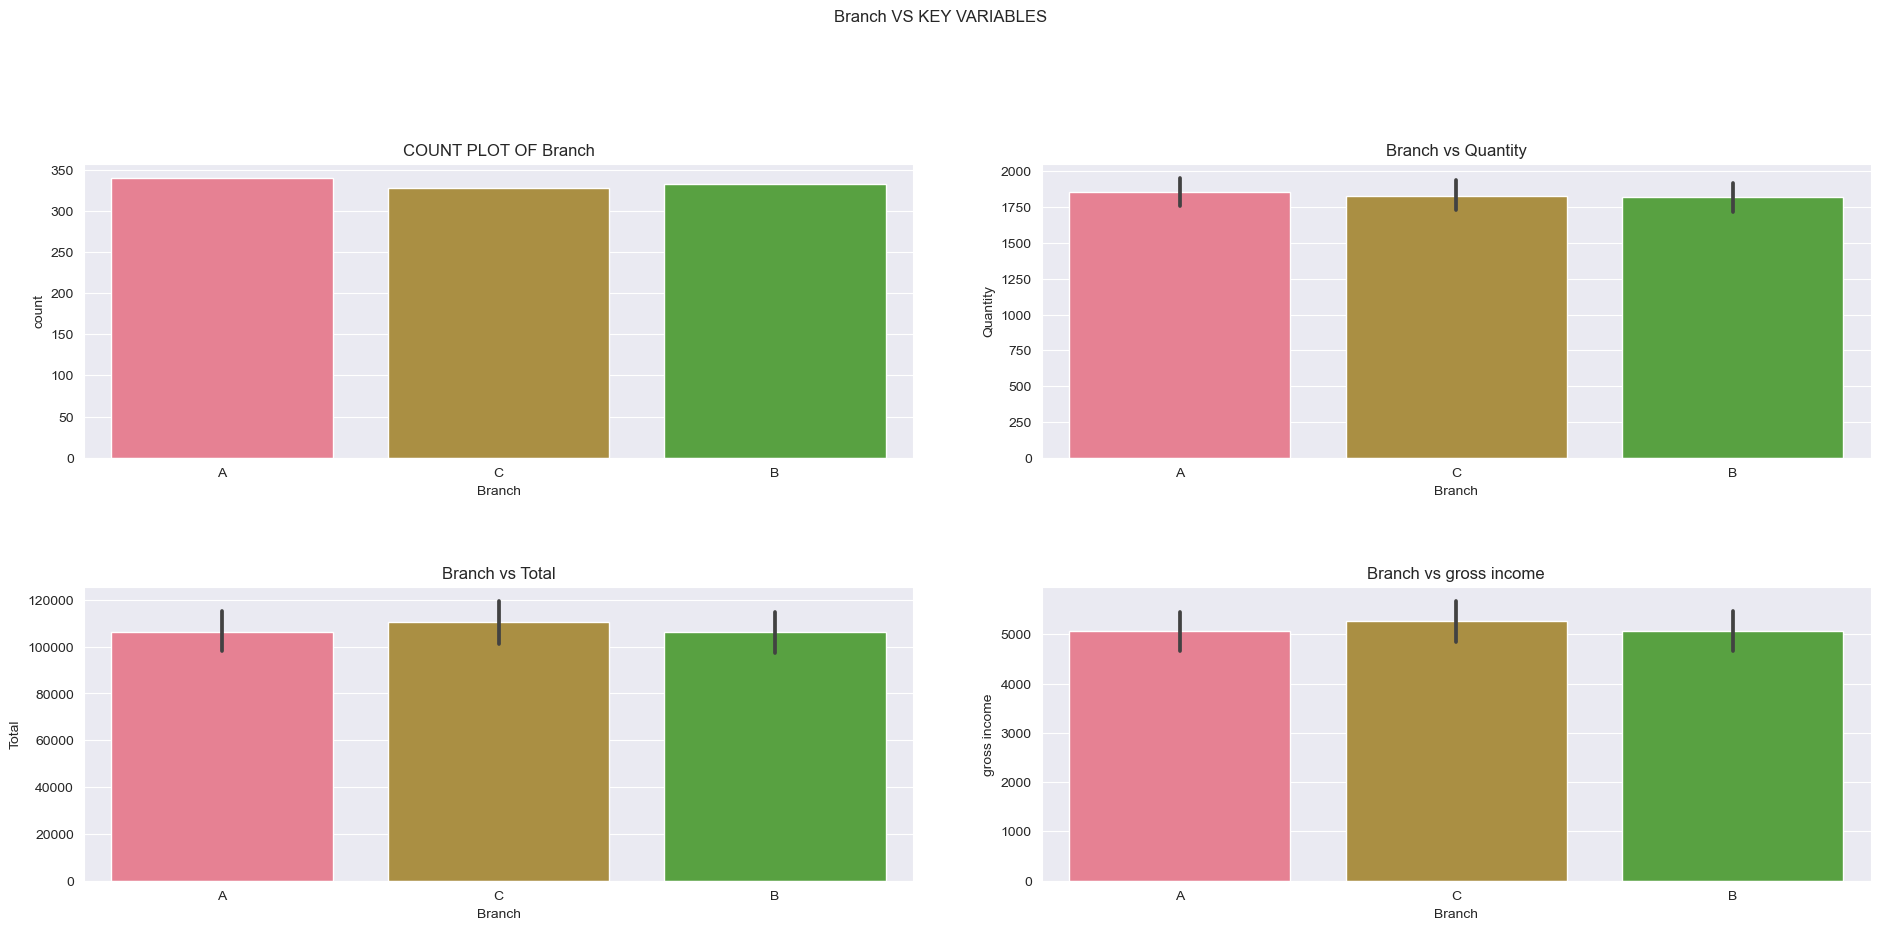

In [19]:
get_plot(x = 'Branch', y = ['Quantity','Total','gross income'],
         title= 'Branch VS KEY VARIABLES')

In [27]:
px.box(data_frame= data, x = 'Branch', y = 'Total', facet_col= 'Gender',
       color= 'Branch')

In [28]:
# generate an histogram of all the other continuous variables
# add a descriptive markdown of all our findings from both the visualisation and stats tests.

Text(0.5, 1.0, 'Correlation Matrix')

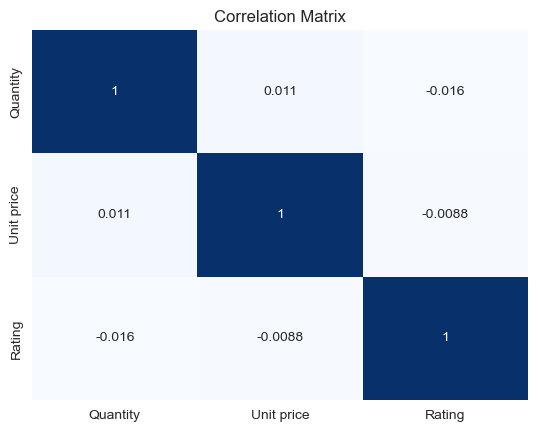

In [37]:
####  STATISTICAL TESTS


corr_df = data[['Quantity','Unit price','Rating']].corr()
sns.heatmap(data= corr_df, cmap= 'Blues', cbar=False, annot= True)

plt.title('Correlation Matrix')

In [40]:
# run a one way anova on brancches vs total cost

branch_a = data[data['Branch'] == "A"]['Total']
branch_c = data[data['Branch'] == "C"]['Total']
branch_b = data[data['Branch'] == "B"]['Total']

test_stats, pvalue = f_oneway(branch_a, branch_b, branch_c)

print(pvalue)

0.413210174367147


In [39]:
# work to do
# one way anova for city

array(['A', 'C', 'B'], dtype=object)

In [41]:
data['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)